# Transfer Human into Cat/Dog

# How to Get Started

---

## Before Run
1. Upload the trained model weights and checkpoints,
  * `human_catdog_best_model.data-00000-of-00001`
  * `human_catdog_best_model.index`
  * `checkpoint`

  Also, staff pictures are provided in `test_pics.zip`.

2. Make sure all the file directories are set as the right path.
3. You might want to delete `fit()` in `CycleGAN - Train` category, if you want to use the model uploaded from the step 1.
4. Run the code.


# Load the Data

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.9 MB/s eta 0:00:00


In [ ]:
# Load the Libraries
from google.colab import drive
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.image import ImageDataGenerator

import tensorflow_addons as tfa
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/PGT/CSC8637_DeepLearning/Coursework/Dataset/cat_and_dog.zip"

Archive:  /content/drive/My Drive/Colab Notebooks/PGT/CSC8637_DeepLearning/Coursework/Dataset/cat_and_dog.zip
  inflating: cat_face.zip            
  inflating: dog faces.zip           


In [ ]:
!unzip "/content/drive/My Drive/Colab Notebooks/PGT/CSC8637_DeepLearning/Coursework/Dataset/face_img.zip"

Archive:  /content/drive/My Drive/Colab Notebooks/PGT/CSC8637_DeepLearning/Coursework/Dataset/face_img.zip
  inflating: face_align_celeba.zip   
  inflating: UTK Face Cropped.zip    


## Unzip

### Cat Face Data

In [ ]:
!unzip "/content/cat_face.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24845.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24846.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24847.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24848.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24849.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24850.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24851.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24852.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24853.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24854.png  
  inflating: Cat-faces-dataset-master/dataset-part3/dataset-part3/cat_24855.png  
  inflating: Cat-faces-dataset-master/dataset-p

### Dog Face Data

In [ ]:
!unzip "/content/dog faces.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/000856/0015.jpg   
  inflating: train/000856/0016.jpg   
  inflating: train/000857/0001.jpg   
  inflating: train/000857/0002.jpg   
  inflating: train/000857/0003.jpg   
  inflating: train/000857/0004.jpg   
  inflating: train/000857/0005.jpg   
  inflating: train/000857/0006.jpg   
  inflating: train/000857/0007.jpg   
  inflating: train/000858/0001.jpg   
  inflating: train/000858/0002.jpg   
  inflating: train/000858/0003.jpg   
  inflating: train/000858/0004.jpg   
  inflating: train/000858/0005.jpg   
  inflating: train/000858/0006.jpg   
  inflating: train/000858/0007.jpg   
  inflating: train/000858/0008.jpg   
  inflating: train/000859/0001.jpg   
  inflating: train/000859/0002.jpg   
  inflating: train/000859/0003.jpg   
  inflating: train/000859/0004.jpg   
  inflating: train/000859/0005.jpg   
  inflating: train/000859/0006.jpg   
  inflating: train/000859/0007.jpg   
  inflating: train/000860/0001.jpg   

### Human Face Data

In [ ]:
!unzip "/content/face_align_celeba.zip"

Streaming output truncated to the last 5000 lines.
 extracting: img_align_celeba/197600.jpg  
 extracting: img_align_celeba/197601.jpg  
 extracting: img_align_celeba/197602.jpg  
 extracting: img_align_celeba/197603.jpg  
 extracting: img_align_celeba/197604.jpg  
 extracting: img_align_celeba/197605.jpg  
 extracting: img_align_celeba/197606.jpg  
 extracting: img_align_celeba/197607.jpg  
 extracting: img_align_celeba/197608.jpg  
 extracting: img_align_celeba/197609.jpg  
 extracting: img_align_celeba/197610.jpg  
 extracting: img_align_celeba/197611.jpg  
 extracting: img_align_celeba/197612.jpg  
 extracting: img_align_celeba/197613.jpg  
 extracting: img_align_celeba/197614.jpg  
 extracting: img_align_celeba/197615.jpg  
 extracting: img_align_celeba/197616.jpg  
 extracting: img_align_celeba/197617.jpg  
 extracting: img_align_celeba/197618.jpg  
 extracting: img_align_celeba/197619.jpg  
 extracting: img_align_celeba/197620.jpg  
 extracting: img_align_celeba/197621.jpg  
 ex

### UTK Cropped face Data

In [ ]:
!unzip "/content/UTK Face Cropped.zip"

Streaming output truncated to the last 5000 lines.
  inflating: utkcropped/utkcropped/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_3_20170104220848558.jpg.chip.jpg  
  inflating: utkcropped/utkcropped/53_0_3_2017010

# Merge Cat and Dog

In [ ]:
# Define the directories containing the image files
human_dir1 = '/content/img_align_celeba'
human_dir2 = '/content/utkcropped'

cat_dir1 = '/content/Cat-faces-dataset-master/dataset-part1/dataset-part1'
cat_dir2 = '/content/Cat-faces-dataset-master/dataset-part2/dataset-part2'
cat_dir3 = '/content/Cat-faces-dataset-master/dataset-part3/dataset-part3'

dog_train = '/content/train'
dog_test = '/content/test_200_database'

In [ ]:
def merge_directories(dst_dir, src_dirs):
  os.makedirs(dst_dir, exist_ok=True)
  for src_dir in src_dirs:
    for root, dirs, files in os.walk(src_dir):
      for file in files:
        src_file = os.path.join(root, file)
        dst_file = os.path.join(dst_dir, file)
        shutil.copy2(src_file, dst_file)

In [ ]:
# New Directory Path
catNdog_train_path = '/content/catNdog_train'
# catNdog_test_path = '/content/catNdog_test'
# Merge Cat and Dog dataset
merge_directories(catNdog_train_path, [cat_dir1, cat_dir2, cat_dir3, dog_train, dog_test])
# merge_directories(catNdog_test_path, [cat_dir3, dog_test])

# Preprocessing

## Combine directories & Rescale pixels

In [ ]:
def preprocess_datasets(directory, image_size=(128, 128), batch_size=32):
  # Preprocessing
  dataset = tf.keras.preprocessing.image_dataset_from_directory(
      directory,
      batch_size=batch_size,
      image_size=image_size,
      labels=None
      )

  return dataset

Human Face

In [ ]:
human_train = preprocess_datasets(human_dir1)
human_test = preprocess_datasets(human_dir2)

Found 202599 files belonging to 1 classes.
Found 47418 files belonging to 1 classes.


Cat & Dog Face

In [ ]:
catNdog_train = preprocess_datasets(catNdog_train_path)
# catNdog_test = preprocess_datasets(catNdog_test_path)

Found 30472 files belonging to 1 classes.


## Normalisation & Create Dataset Objects

In [ ]:
def normalize_img(img):
  img = tf.cast(img, dtype=tf.float32)
  # Map values in the range [-1, 1]
  return (img / 127.5) - 1.0

def preprocess_image(img):
    # Data Augmentation
    data_augmentation = ImageDataGenerator(
        rotation_range=10,
        horizontal_flip=True,
        # vertical_flip=True,
        # height_shift_range=0.1,
        # width_shift_range=0.1,
        brightness_range=(0.5, 1.5)
        )
    # Normalize the pixel values in the range [-1, 1]
    img = normalize_img(img)
    return img

In [ ]:
autotune = tf.data.AUTOTUNE
# buffer_size = 128

# Apply the preprocessing operations to the training data
human_train = (
    human_train.map(preprocess_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(20000)
)
catNdog_train = (
    catNdog_train.map(preprocess_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(4000)
)

# Apply the preprocessing operations to the test data
human_test = (
    human_test.map(normalize_img, num_parallel_calls=autotune)
    .cache()
    .shuffle(3000)
)
# catNdog_test = (
#     catNdog_test.map(normalize_img, num_parallel_calls=autotune)
#     .cache()
#     .shuffle(buffer_size)
# )

# Visualise the Data

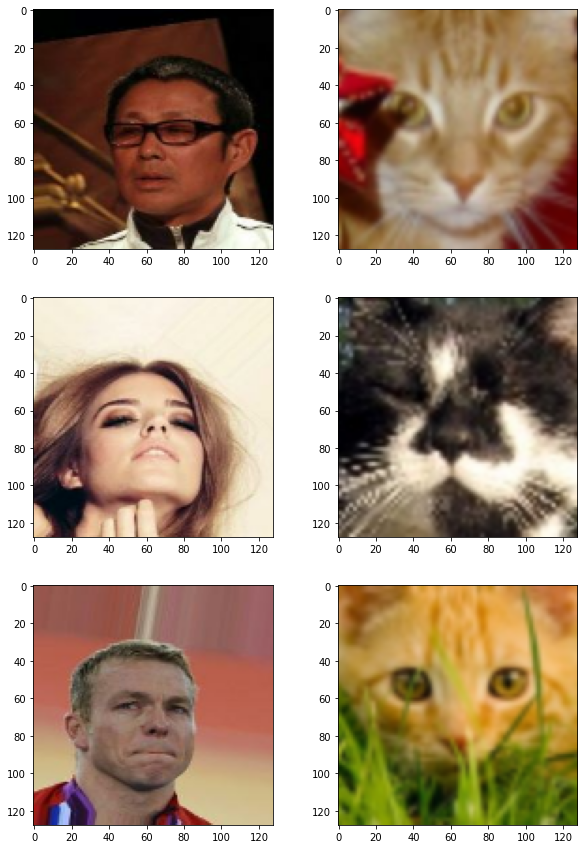

In [ ]:
_, ax = plt.subplots(3, 2, figsize=(10, 15))
for i, samples in enumerate(zip(human_train.take(3), catNdog_train.take(3))):
    human = (((samples[0][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    catNdog = (((samples[1][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    ax[i, 0].imshow(human)
    ax[i, 1].imshow(catNdog)
plt.show()

# Blocks for Generator & Discriminator

In [ ]:
# Weights initializer for layers
kernel_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# Gamma initializer for instance normalization
gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

In [ ]:
class ReflectionPadding2D(layers.Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super().__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return tf.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    kernel_initializer=kernel_init,
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        kernel_initializer=kernel_initializer,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x

# Generators

In [ ]:
input_img_size = (128, 128, 3)

In [ ]:
def get_resnet_generator(
    filters=68,
    num_downsampling_blocks=2,
    num_residual_blocks=10,
    num_upsample_blocks=2,
    gamma_initializer=gamma_init,
    name=None,
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = ReflectionPadding2D(padding=(3, 3))(img_input)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, use_bias=False)(
        x
    )
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.Activation("relu")(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation("relu"))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation("relu"))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation("relu"))

    # Final block
    x = ReflectionPadding2D(padding=(3, 3))(x)
    x = layers.Conv2D(3, (7, 7), padding="valid")(x)
    x = layers.Activation("tanh")(x)

    model = keras.models.Model(img_input, x, name=name)
    return model

# Discriminators

In [ ]:
def get_discriminator(
    filters=68, kernel_initializer=kernel_init, num_downsampling=3, name=None
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = layers.Conv2D(
        filters,
        (4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer=kernel_initializer,
    )(img_input)
    x = layers.LeakyReLU(0.2)(x)

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )

    x = layers.Conv2D(
        1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer
    )(x)

    model = keras.models.Model(inputs=img_input, outputs=x, name=name)
    return model


# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


# CycleGAN

## Model

In [ ]:
class CycleGan(keras.Model):
    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super().__init__()
        self.gen_G = generator_G
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super().compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = keras.losses.MeanAbsoluteError()
        self.identity_loss_fn = keras.losses.MeanAbsoluteError()

    def train_step(self, batch_data):
        # x is Horse and y is zebra
        real_x, real_y = batch_data

        # For CycleGAN, we need to calculate different
        # kinds of losses for the generators and discriminators.
        # We will perform the following steps here:
        #
        # 1. Pass real images through the generators and get the generated images
        # 2. Pass the generated images back to the generators to check if we
        #    we can predict the original image from the generated image.
        # 3. Do an identity mapping of the real images using the generators.
        # 4. Pass the generated images in 1) to the corresponding discriminators.
        # 5. Calculate the generators total loss (adverserial + cycle + identity)
        # 6. Calculate the discriminators loss
        # 7. Update the weights of the generators
        # 8. Update the weights of the discriminators
        # 9. Return the losses in a dictionary

        with tf.GradientTape(persistent=True) as tape:
            # Horse to fake zebra
            fake_y = self.gen_G(real_x, training=True)
            # Zebra to fake horse -> y2x
            fake_x = self.gen_F(real_y, training=True)

            # Cycle (Horse to fake zebra to fake horse): x -> y -> x
            cycled_x = self.gen_F(fake_y, training=True)
            # Cycle (Zebra to fake horse to fake zebra) y -> x -> y
            cycled_y = self.gen_G(fake_x, training=True)

            # Identity mapping
            same_x = self.gen_F(real_x, training=True)
            same_y = self.gen_G(real_y, training=True)

            # Discriminator output
            disc_real_x = self.disc_X(real_x, training=True)
            disc_fake_x = self.disc_X(fake_x, training=True)

            disc_real_y = self.disc_Y(real_y, training=True)
            disc_fake_y = self.disc_Y(fake_y, training=True)

            # Generator adverserial loss
            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            gen_F_loss = self.generator_loss_fn(disc_fake_x)

            # Generator cycle loss
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle

            # Generator identity loss
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )

            # Total generator loss
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        # Get the gradients for the discriminators
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)

        # Update the weights of the generators
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        # Update the weights of the discriminators
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }

## Train

In [119]:
# Loss function for evaluating adversarial loss
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5


# Create cycle gan model
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

# Compile the model
cycle_gan_model.compile(
    gen_G_optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    gen_F_optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    disc_X_optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    disc_Y_optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)

# Define the ModelCheckpoint callback
checkpoint_filepath = 'human_catdog_best_model'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True
    )

In [125]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((human_train, catNdog_train)),
    epochs=5,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/5
953/953 [==============================] - 702s 737ms/step - G_loss: 2.7276 - F_loss: 2.1568 - D_X_loss: 0.2324 - D_Y_loss: 0.1898
Epoch 2/5
953/953 [==============================] - 702s 736ms/step - G_loss: 2.7590 - F_loss: 2.1577 - D_X_loss: 0.2340 - D_Y_loss: 0.1730
Epoch 3/5
953/953 [==============================] - 702s 737ms/step - G_loss: 2.7409 - F_loss: 2.1751 - D_X_loss: 0.2340 - D_Y_loss: 0.1754
Epoch 4/5
953/953 [==============================] - 702s 737ms/step - G_loss: 2.6864 - F_loss: 2.1574 - D_X_loss: 0.2350 - D_Y_loss: 0.1845
Epoch 5/5
953/953 [==============================] - 702s 737ms/step - G_loss: 2.8397 - F_loss: 2.2292 - D_X_loss: 0.2332 - D_Y_loss: 0.1520


In [126]:
cycle_gan_model.load_weights(checkpoint_filepath).expect_partial()

# Transfer Human face into Cat/Dog face

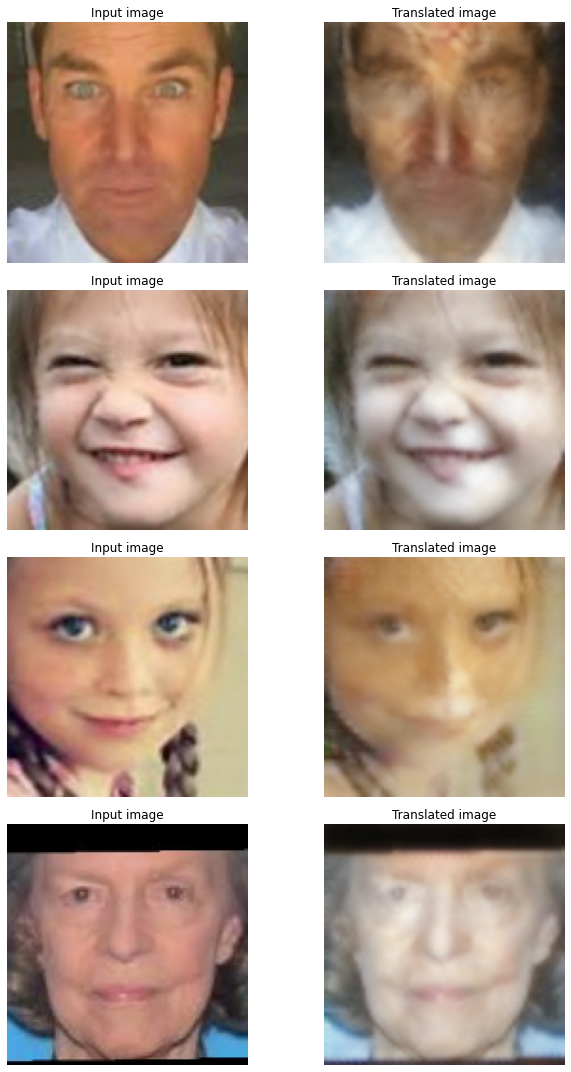

In [179]:
_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(human_test.take(4)):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()

# Test

In [ ]:
test_imgs_path = '/content/drive/My Drive/Colab Notebooks/PGT/CSC8637_DeepLearning/Coursework/Dataset/test_pics'
# test_imgs = preprocess_datasets(test_imgs_path)

test_imgs = tf.keras.preprocessing.image_dataset_from_directory(
    test_imgs_path,
    batch_size=1,
    image_size=(128, 128),
    labels=None
    )
  
autotune = tf.data.AUTOTUNE
test_imgs = (
    test_imgs.map(normalize_img, num_parallel_calls=autotune)
    .cache()
)

Found 4 files belonging to 1 classes.


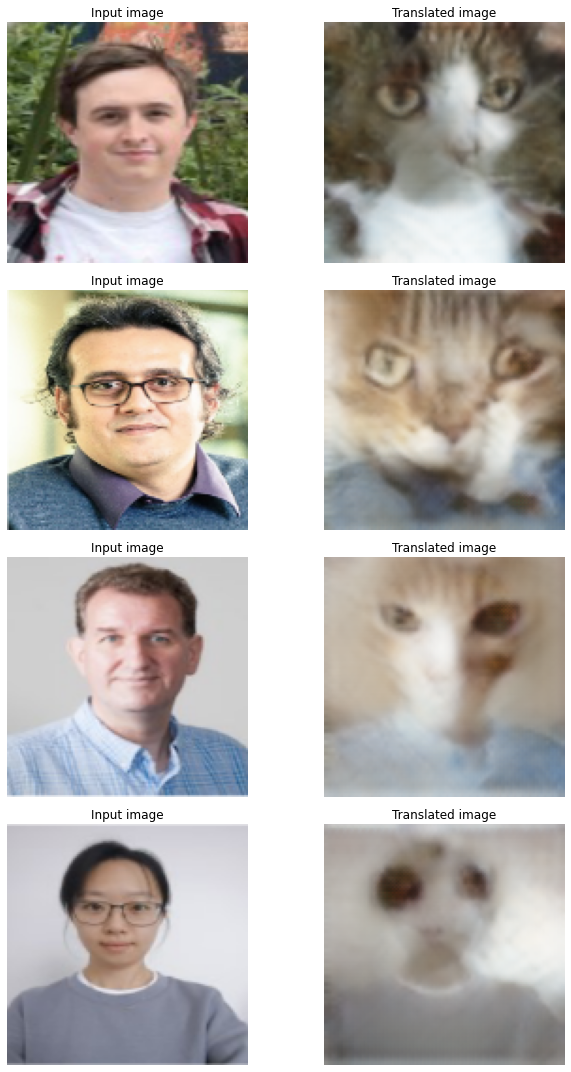

In [128]:
_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(test_imgs):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()